<a href="https://colab.research.google.com/github/anandhulk/Quora-sincere-and-insincere-questions-classification/blob/main/Bidirectional_moldel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np 
import pandas as pd 
from sklearn.utils import shuffle
import spacy
nlp = spacy.load("en_core_web_sm")
import pickle

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/dataset-quora/primaryDataset.csv') #THIS IS THE LEMMATIZED DATA
data

,0,target
0,how long be taiwanese people behind,1
1,what be some computer store in Dayton Ohio,0
2,why do so many people think Japanese be superi...,1
3,how do I start to invest Bitcoin,0
4,be get in th CBSE humanity good will I scor...,0
...,...,...
161614,what should I do now have only day leave for ...,0
161615,what be the requirement in an invoice under GS...,0
161616,what would the USA be like today if Obama have...,1
161617,which Indian author book novel have drive yo...,1


In [5]:
data=data.dropna()

# Data cleaning(removing ?.!*@#%*_+}{ etc..)

In [6]:
import re

def clean_text(series):
    res=[]
    for row in series:
        text = re.sub(r'[^(a-zA-Z)\s]','', row)
        res.append(text)
    res=pd.Series(res)
    return res

In [7]:
cleaned_x=clean_text(data["0"])

In [8]:
cleaned_x

0                      how long be taiwanese people behind 
1              what be some computer store in Dayton  Ohio 
2         why do so many people think Japanese be superi...
3                         how do I start to invest Bitcoin 
4         be get   in th CBSE humanity good  will I scor...
                                ...                        
161614    what should I do now have only  day leave for ...
161615    what be the requirement in an invoice under GS...
161616    what would the USA be like today if Obama have...
161617    which Indian  author book  novel have drive yo...
161618    why be it that Samsung and iPhone screen break...
Length: 161619, dtype: object

In [9]:
y=data["target"]
y

0         1
1         0
2         1
3         0
4         0
         ..
161614    0
161615    0
161616    1
161617    1
161618    1
Name: target, Length: 161619, dtype: int64

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,GRU,GlobalMaxPool1D

# **One Hot encoding**

In [11]:
vocab_size=50000
max_len=100
tokenizer=Tokenizer(num_words=vocab_size)
fit_text=list(cleaned_x)

In [18]:
tokenizer.fit_on_texts(fit_text)
text=tokenizer.texts_to_sequences(cleaned_x)

In [20]:
print(len(tokenizer.word_index))

51781


In [31]:
cleaned_x[1]

'what be some computer store in Dayton  Ohio '

In [32]:
text[1]

[10, 1, 56, 495, 953, 8, 19130, 6123]

# **Padding the Sequence**

In [33]:
padded_x=pad_sequences(text,maxlen=max_len,padding='pre')

In [34]:
padded_x

array([[    0,     0,     0, ...,  2587,    21,   519],
       [    0,     0,     0, ...,     8, 19130,  6123],
       [    0,     0,     0, ...,  2544,     4,   365],
       ...,
       [    0,     0,     0, ...,    16,     1,    66],
       [    0,     0,     0, ...,   805,   315,    15],
       [    0,     0,     0, ...,  1155,    25,    10]], dtype=int32)

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(padded_x,y,random_state=42)
xtrain.shape,ytrain.shape

((121214, 100), (121214,))

# **BIDIRECTIONAL LSTM MODEL**

In [55]:
model=Sequential([
    Embedding(vocab_size,360,input_length=max_len),
    Bidirectional(LSTM(128,return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(64,return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(32,return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(10,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")
])

In [56]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=METRICS)


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 360)          18000000  
                                                                 
 bidirectional_18 (Bidirecti  (None, 100, 256)         500736    
 onal)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 100, 256)          0         
                                                                 
 bidirectional_19 (Bidirecti  (None, 100, 128)         164352    
 onal)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 100, 128)          0         
                                                                 
 bidirectional_20 (Bidirecti  (None, 100, 64)         

In [57]:
model.fit(xtrain,ytrain,epochs=2,validation_data=(xtest,ytest))

Epoch 1/2
3788/3788 [==============================] - 181s 45ms/step - loss: 0.3235 - accuracy: 0.8738 - precision: 0.8644 - recall: 0.8869 - val_loss: 0.2791 - val_accuracy: 0.8911 - val_precision: 0.8734 - val_recall: 0.9142
Epoch 2/2
3788/3788 [==============================] - 170s 45ms/step - loss: 0.2450 - accuracy: 0.9101 - precision: 0.8957 - recall: 0.9285 - val_loss: 0.2796 - val_accuracy: 0.8905 - val_precision: 0.8841 - val_recall: 0.8981


In [58]:
model.evaluate(xtest,ytest)

1263/1263 [==============================] - 20s 16ms/step - loss: 0.2796 - accuracy: 0.8905 - precision: 0.8841 - recall: 0.8981


[0.2796241343021393,
 0.8904591202735901,
 0.8840969204902649,
 0.8981343507766724]

In [65]:
model.save("/content/drive/MyDrive/dataset-quora/Bidirectional_lstm_Model")

<a href="./BidirectionalLSTM"> Download File </a>

In [68]:
# saving
with open('/content/drive/MyDrive/dataset-quora/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# **EVALUATION**

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
y_pred=model.predict(xtest)

In [61]:
y_p=[]
for i in y_pred:
    if(i>=0.5):
        y_p.append(1)
    else:
        y_p.append(0)

In [62]:
confusion=confusion_matrix(ytest,y_p)

# **CONFUSION MATRIX**

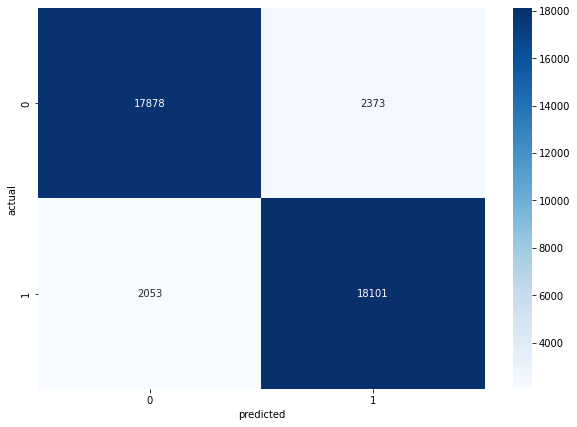

In [63]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [64]:
print("     Classification report of Word2vec + LSTM model\n")
print(classification_report(ytest,y_p))

     Classification report of Word2vec + LSTM model

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     20251
           1       0.88      0.90      0.89     20154

    accuracy                           0.89     40405
   macro avg       0.89      0.89      0.89     40405
weighted avg       0.89      0.89      0.89     40405



# **PREDICTION FUNCTION**

In [69]:
def lemmatize(df):
    res=[]
    for row in df:
        doc=nlp(row)
        row=" ".join([w.lemma_ for w in nlp(row)])
        res.append(row)
    return res

In [106]:
def Predict(stre):
  stre=nlp(stre)
  stre=" ".join([w.lemma_ for w in nlp(stre)])
  listt=[]
  listt.append(stre)
  listt=tokenizer.texts_to_sequences(listt)
  listt=pad_sequences(listt,maxlen=max_len,padding='pre')
  pred=model.predict(listt)
  if(pred>=0.5):
    print('InSincere')
    print(pred[0][0])
  else:
    print('Sincere')
    print(pred[0][0])

In [119]:
q=input("Enter your Question :")
Predict(q)

Enter your Question :why women do all the household work
InSincere
0.9460423
